# Overview

# Imports

In [72]:
from bs4 import BeautifulSoup
import datetime
import pandas as pd
from pathlib import Path
import requests

# Filepaths and data sources

In [4]:
past_words_url = 'https://www.rockpapershotgun.com/wordle-past-answers'
# all_words_url = 

# Get a used wordle words and a list of all 5 letter words from the internet

## Used words
* On the page, this is how the wordlist is starting, under this heading h2:

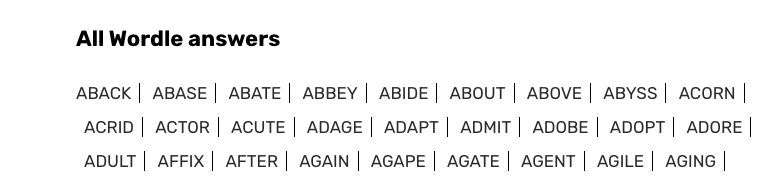

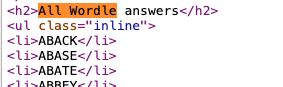

In [5]:
# send an HTTP request to the webpage
try:
    response = requests.get(past_words_url)
    response.raise_for_status()
except:
    
    

In [12]:
# Parse the content using BeautifulSoup object
content = response.text
soup = BeautifulSoup(content, 'html.parser')

In [34]:
# find the subheading for the word list
heading_to_find = 'all wordle answers'
heading_tag = 'h2'


In [37]:
# find all h2 and collect the h2 tags in a list
# this will not be a list of strings but a list of tag objects
all_headings = soup.find_all(heading_tag)

In [54]:
# tag objects have a string attribute which holds the text at that level
heading_of_interest = None
for heading in all_headings:
    if heading_to_find in heading.text.lower():
        heading_of_interest = heading

In [62]:
# once the right heading tag is extracted, use it to find the ul (unordered list) tag at the same level as the h2 tag

ul_tag = heading_of_interest.find_next_sibling('ul')

In [66]:
# within the ul tag, get all list items <li>

all_list_tags = ul_tag.find_all('li')

In [67]:
all_words = [tag.text.lower() for tag in all_list_tags if tag.text is not None]

In [68]:
all_words

['aback',
 'abase',
 'abate',
 'abbey',
 'abide',
 'about',
 'above',
 'abyss',
 'acorn',
 'acrid',
 'actor',
 'acute',
 'adage',
 'adapt',
 'admit',
 'adobe',
 'adopt',
 'adore',
 'adult',
 'affix',
 'after',
 'again',
 'agape',
 'agate',
 'agent',
 'agile',
 'aging',
 'aglow',
 'agony',
 'agree',
 'ahead',
 'aisle',
 'album',
 'alert',
 'alien',
 'alike',
 'alive',
 'allow',
 'aloft',
 'alone',
 'aloof',
 'aloud',
 'alpha',
 'altar',
 'alter',
 'amass',
 'amber',
 'amble',
 'amiss',
 'ample',
 'angel',
 'anger',
 'angle',
 'angry',
 'angst',
 'anode',
 'antic',
 'anvil',
 'aorta',
 'apart',
 'aphid',
 'apple',
 'apply',
 'apron',
 'aptly',
 'arbor',
 'ardor',
 'argue',
 'aroma',
 'arrow',
 'artsy',
 'ascot',
 'ashen',
 'aside',
 'askew',
 'asset',
 'atlas',
 'atoll',
 'atone',
 'audio',
 'audit',
 'avail',
 'avert',
 'await',
 'awake',
 'award',
 'awash',
 'awful',
 'axiom',
 'azure',
 'bacon',
 'badge',
 'badly',
 'bagel',
 'baker',
 'balsa',
 'banal',
 'barge',
 'basic',
 'basin',


In [88]:
datetime.datetime.now().date().day

28

In [70]:
df = pd.DataFrame({'word':all_words})

In [71]:
df

,word
0,aback
1,abase
2,abate
3,abbey
4,abide
...,...
1404,yield
1405,young
1406,youth
1407,zebra
